
Name: Raul Catacora

email: rcatagrundy@gmail.com

Practical Application of Supervised and Unsupervised Learning

Total Marks: 20

**Task 1: Classification Algorithms (8 marks)**

Logistic Regression Implementation (2 marks):

* Implement a logistic regression model using a provided dataset.
* Evaluate the model's performance using appropriate metrics.

Support Vector Machine Implementation (2 marks):

* Apply a Support Vector Machine (SVM) classifier to the same dataset.
* Compare and contrast the results with logistic regression.

Random Forest Application (2 marks):

* Implement a Random Forest classifier with a different dataset.
* Discuss scenarios where Random Forest might outperform other classifiers.

Ensemble Model Experimentation (2 marks):

* Combine the models from tasks 1 and 2 using ensemble techniques (e.g., Voting Classifier).
* Evaluate the ensemble model's performance and explain any observed improvements.


### Loading the breast cancer dataset

In [2]:
# Loading the dataset from sklearn datasets

import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer

cancer_dataset = load_breast_cancer()
print(cancer_dataset.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [3]:
# Extract features (X) and target labels (y)
X = cancer_dataset.data  # Features
y = cancer_dataset.target  # Target labels (0: malignant, 1: benign)

In [10]:
## Logistic Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

model = LogisticRegression(max_iter=1000, random_state=42).fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Breast cancer dataset')
print('Accuracy of Logistic regression classifier on training set: {:.2f}'.format(model.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'.format(model.score(X_test, y_test)))
print('Accuracy of Logistic regression classifier: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision on training data: {:.2f}'.format(precision_score(y_test, y_pred)))
print('Recall on training data: {:.2f}'.format(recall_score(y_test, y_pred)))
print('F1 score on training data: {:.2f}'.format(f1_score(y_test, y_pred)))

Breast cancer dataset
Accuracy of Logistic regression classifier on training set: 0.96
Accuracy of Logistic regression classifier on test set: 0.96
Accuracy of Logistic regression classifier: 0.96
Precision on training data: 0.99
Recall on training data: 0.94
F1 score on training data: 0.97


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [15]:
# SVM classifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)  # You can choose different kernels such as 'linear', 'rbf', 'poly', etc.

# Fit SVM classifier
svm_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm_classifier.predict(X_test)

# Evaluate the SVM classifier
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy:", accuracy_svm)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))

Accuracy: 0.956140350877193

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



 SVM seeks to find the optimal hyperplane that separates the classes in the feature space with the largest margin while minimizing classification errors.
 In this case are pretty similar but ther are other uses cases where svm would outperform logistic regression.

* Use logistic regression when:

1. Linear Decision Boundary: When the decision boundary between classes is linear or nearly linear, logistic regression is often a suitable choice. Logistic regression models the relationship between the features and the log-odds of the outcome using a linear function, making it appropriate for linearly separable datasets.

2. Interpretability: Logistic regression provides interpretable results in terms of odds ratios and probabilities. It allows for straightforward interpretation of the impact of individual features on the probability of a particular outcome, making it valuable for understanding the relationship between predictors and the target variable.

3. Efficiency with Large Datasets: Logistic regression is computationally efficient and scales well to large datasets with a high number of features. It can handle high-dimensional data without requiring extensive computational resources, making it suitable for applications with large sample sizes.

4. Binary Classification: Logistic regression is specifically designed for binary classification tasks, where the target variable has two possible outcomes. It is a natural choice for problems where the goal is to predict the probability of one of two mutually exclusive classes.

* Use SVM when:

1. Non-linear Decision Boundary: SVMs are effective for datasets with complex, non-linear decision boundaries. By using different kernel functions (e.g., polynomial, radial basis function), SVMs can capture complex patterns in the data and find optimal separating hyperplanes in high-dimensional feature spaces.

2. Margin Maximization: SVMs aim to maximize the margin between the decision boundary and the nearest data points of each class. This margin maximization strategy results in a robust classifier that generalizes well to unseen data and is less sensitive to outliers.

3. Small to Medium-sized Datasets: SVMs are suitable for datasets with moderate sample sizes and dimensions. While SVMs can be computationally intensive, they are effective for datasets with hundreds to thousands of samples and features, where they can find well-defined decision boundaries.

4. Binary or Multi-class Classification: SVMs can be used for both binary and multi-class classification tasks. They can be extended to handle multi-class problems through strategies such as one-vs-rest or one-vs-one classification.

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust the number of trees (n_estimators)

# Fit Random Forest classifier
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the Random Forest classifier
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy_rf)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

Accuracy: 0.9649122807017544

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



Random Forest is an ensemble learning method that constructs multiple decision trees during training and combines their predictions to improve generalization and robustness.
So, in other words it would work amazingly with the cancer_dataset

 Random Forest is well-suited for a wide range of applications, including classification and regression tasks, high-dimensional data, non-linear relationships, robustness to overfitting, handling missing values and outliers, variable importance analysis, and parallelization. It is a versatile and reliable algorithm that often provides excellent out-of-the-box performance across diverse datasets and domains.

In [14]:
from sklearn.ensemble import VotingClassifier

In [15]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize base classifiers
log_reg = LogisticRegression(max_iter=10000, random_state=42)
svm_clf = SVC(kernel='linear', probability=True, random_state=42)

# Create a Voting Classifier with soft voting (using predicted probabilities)
voting_clf = VotingClassifier(estimators=[('lr', log_reg), ('svm', svm_clf)], voting='soft')

# Fit the Voting Classifier
voting_clf.fit(X_train, y_train)

# Predict on the test set
y_pred_voting = voting_clf.predict(X_test)

# Evaluate the Voting Classifier
accuracy_voting = accuracy_score(y_test, y_pred_voting)
print("Accuracy:", accuracy_voting)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_voting))

Accuracy: 0.956140350877193

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



There's not much of an improvement while applying the voting classifier in this case. But use cases where it might help are:

1. Diverse Base Models: Voting Classifier works well when the base classifiers are diverse and have different strengths and weaknesses. By combining the predictions of multiple classifiers with diverse characteristics, Voting Classifier can leverage the complementary nature of individual models and achieve better generalization performance.

2. Reduction of Variance: Voting Classifier can help reduce variance by averaging the predictions of multiple base models. This ensemble approach can lead to more stable and reliable predictions, particularly when individual models are prone to overfitting or high variance.

3. Model Robustness: Voting Classifier can improve model robustness by mitigating the impact of outliers or noisy data. By combining the predictions of multiple models, Voting Classifier can produce more robust predictions that are less sensitive to individual data points or model biases.

4. Improved Generalization: Voting Classifier can enhance generalization performance by combining the knowledge from multiple models trained on different subsets of the data or using different algorithms. This ensemble approach helps capture diverse patterns in the data and can lead to better generalization to unseen data.

5. Ensemble of Weak Learners: Voting Classifier can be effective when combining multiple weak learners to create a strong learner. Weak learners, such as decision stumps or shallow decision trees, may have limited predictive power individually, but their collective predictions can be boosted through ensemble methods like Voting Classifier.

6. Model Diversity: Voting Classifier can benefit from diverse base models that are trained using different algorithms, feature subsets, or hyperparameters. This diversity ensures that the ensemble captures a wide range of perspectives and can adapt to different aspects of the data, leading to more robust and accurate predictions.

7. Ensemble of Experts: Voting Classifier can be used to combine the predictions of multiple specialized models or experts in different domains. Each expert may have domain-specific knowledge or expertise, and by aggregating their predictions, Voting Classifier can provide more comprehensive and accurate predictions across diverse problem domains.

Voting Classifier is valuable in situations where combining the predictions of multiple classifiers can lead to improved predictive performance, model robustness, and generalization to unseen data. It is particularly effective when the base models are diverse, complementary, and individually capable of capturing different aspects of the data or problem space.

**Task 2: More on Regression (5 marks)**

Polynomial Regression Implementation (2 marks):
* Apply Polynomial Regression to a given dataset with non-linear patterns.
* Visualize the regression curve and interpret the results.

Ridge and Lasso Regression (3 marks):
* Implement Ridge and Lasso Regression on a dataset with multicollinearity.
* Discuss the impact of regularization on model coefficients and overall performance.


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Mean Squared Error: 0.08006128792848069


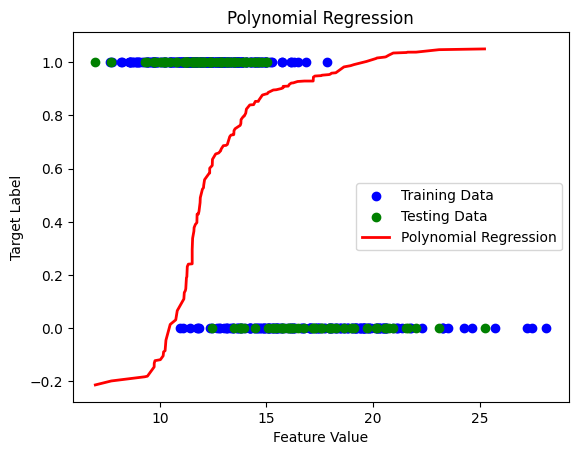

In [5]:
# Select a single feature for polynomial regression (e.g., mean radius)
feature_index = 0  # Choose the index of the feature to use
X_feature = X[:, feature_index].reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X_feature, y, test_size=0.2, random_state=42)

# Polynomial regression
degree = 3  # Choose the degree of the polynomial
poly_features = PolynomialFeatures(degree=degree)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)

# Fit polynomial regression model
model = LinearRegression()
model.fit(X_poly_train, y_train)

# Predict on the test set
y_pred = model.predict(X_poly_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Plot the polynomial regression curve
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='green', label='Testing Data')
plt.plot(np.sort(X_test, axis=0), np.sort(model.predict(X_poly_test), axis=0), color='red', linewidth=2, label='Polynomial Regression')
plt.title('Polynomial Regression')
plt.xlabel('Feature Value')
plt.ylabel('Target Label')
plt.legend()
plt.show()

polynomial regression may not be the most suitable approach for binary classification tasks like breast cancer detection.

But for interpretation,

1. Curve Fitting: The polynomial regression model aims to fit a curve to the data points in such a way that it captures the underlying trend or relationship between the predictor variable(s) and the target variable. The visualization typically shows the original data points along with the fitted polynomial curve.

2. Degree of the Polynomial: The degree of the polynomial determines the complexity of the curve. Higher-degree polynomials can capture more complex relationships in the data but may also lead to overfitting, especially if the degree is too high relative to the size of the dataset.

3. Underfitting vs. Overfitting: When interpreting the visualization, consider whether the polynomial curve adequately captures the underlying trend in the data. If the curve is too simple (e.g., underfitting), it may fail to capture important patterns, resulting in poor predictive performance. Conversely, if the curve is too complex (e.g., overfitting), it may fit the noise in the data rather than the underlying trend, leading to poor generalization to unseen data.

4. Goodness of Fit: Assess the goodness of fit of the polynomial regression model by visually inspecting how well the fitted curve aligns with the data points. A well-fitted model should closely follow the trend of the data without excessively deviating from it. However, be cautious of overfitting, as a curve that closely follows all data points may not generalize well to new data.

5. Predictive Performance: While the visualization provides insights into the relationship between the predictor variable(s) and the target variable, it's essential to evaluate the model's predictive performance using appropriate metrics such as mean squared error, R-squared, or cross-validation scores. This helps ensure that the polynomial regression model accurately captures the underlying relationship and generalizes well to unseen data.

6. Extrapolation: Be cautious when extrapolating beyond the range of the observed data. Polynomial regression models may not be reliable for making predictions outside the range of the training data, especially for higher-degree polynomials, as they tend to diverge rapidly from the observed data points.

In [7]:
from sklearn.linear_model import Ridge, Lasso

In [8]:
# Initialize Ridge regression model
ridge_model = Ridge(alpha=0.1)  # You can adjust the regularization strength (alpha) as needed

# Fit Ridge regression model
ridge_model.fit(X_train, y_train)

# Predict on the test set using Ridge regression
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate Ridge regression model using mean squared error
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print("Ridge Regression Mean Squared Error:", mse_ridge)

# Initialize Lasso regression model
lasso_model = Lasso(alpha=0.1)  # You can adjust the regularization strength (alpha) as needed

# Fit Lasso regression model
lasso_model.fit(X_train, y_train)

# Predict on the test set using Lasso regression
y_pred_lasso = lasso_model.predict(X_test)

# Evaluate Lasso regression model using mean squared error
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print("Lasso Regression Mean Squared Error:", mse_lasso)

Ridge Regression Mean Squared Error: 0.0938515235269067
Lasso Regression Mean Squared Error: 0.09662241534120265


Ridge regression adds a penalty term equivalent to the square of the magnitude of coefficients, while Lasso regression adds a penalty term equivalent to the absolute value of coefficients. These penalty terms are controlled by the regularization strength parameter (alpha). Adjusting alpha allows you to control the level of regularization applied to the models. Lower values of alpha correspond to weaker regularization (closer to ordinary linear regression), while higher values of alpha correspond to stronger regularization. You can adjust alpha values as needed based on the level of regularization desired for your models

**Task 3: Introduction to Unsupervised Learning (7 marks)**

K-Means Clustering Implementation (2 marks):
* Implement the K-Means clustering algorithm on a provided dataset.
* Visualize the clustered data and discuss the choice of the number of clusters (k).

Mean Shift Clustering Experiment (2 marks):
* Apply Mean Shift clustering to a different dataset.
* Analyze the adaptability of Mean Shift to data density and distribution.

Hierarchical Clustering Visualization (3 marks):
* Implement hierarchical clustering with a dataset suitable for hierarchical structures.
* Create and interpret a dendrogram to represent data relationships.

Clustering Comparison (2 marks):
* Compare and contrast the results of K-Means, Mean Shift, and Hierarchical Clustering in terms of interpretability and use cases.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


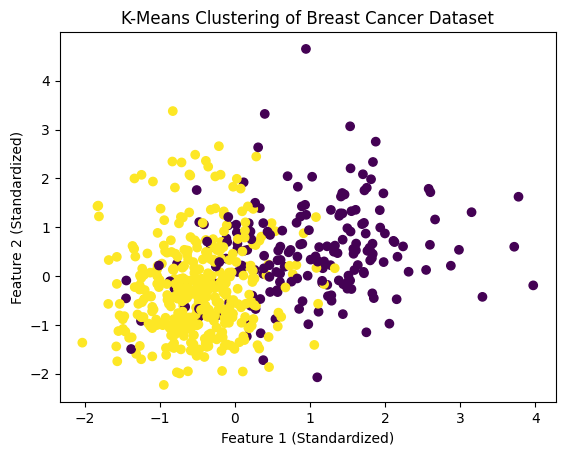

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Extract features (X)
X = cancer_dataset.data  # Features

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply k-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)  # Assuming 2 clusters for simplicity
kmeans.fit(X_scaled)

# Get cluster labels
cluster_labels = kmeans.labels_

# Visualize the clusters (using only two features for simplicity)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cluster_labels, cmap='viridis')
plt.title('K-Means Clustering of Breast Cancer Dataset')
plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')
plt.show()

There is only the need for two cluster because of the nature of the dataset, bening or malign cells. The "classification" or grouping is made on this terms and only adjust to that output.

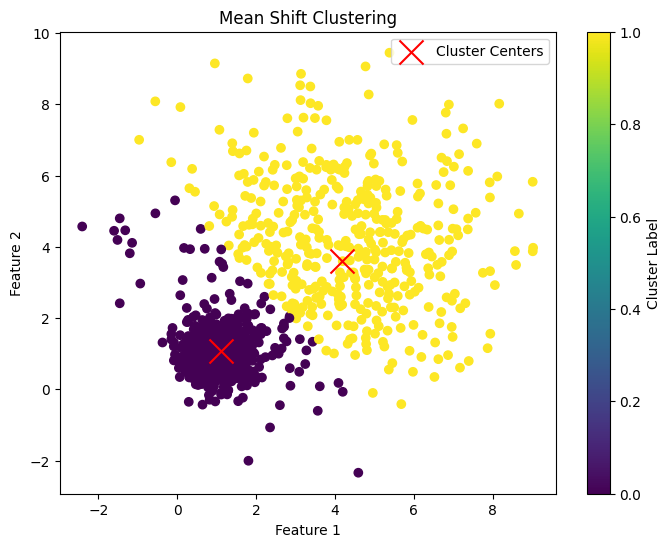

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

# Generate synthetic data with two clusters of different densities
centers = [[1, 1], [4, 4]]
X, _ = make_blobs(n_samples=1000, centers=centers, cluster_std=[0.5, 2])

# Apply Mean Shift clustering
ms = MeanShift()
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', color='red', s=300, label='Cluster Centers')
plt.title('Mean Shift Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.colorbar(label='Cluster Label')
plt.show()

Mean Shift clustering is a density-based clustering algorithm that iteratively shifts centroids towards regions of higher data density. This adaptive behavior allows Mean Shift to effectively handle data with varying densities and distributions. Here's how the algorithm adapts to changes in data density and distribution:

1. Kernel Bandwidth Estimation: Mean Shift uses a kernel function (often Gaussian) to estimate the density of data points in the vicinity of each candidate centroid. The bandwidth of the kernel determines the size of the neighborhood considered when estimating local density. Larger bandwidth values result in smoother density estimates and can capture broader patterns in the data, while smaller bandwidth values focus on fine-grained details and may lead to more localized density estimates.

2. Centroid Update: In each iteration of Mean Shift, the centroids are updated by shifting them towards the mean of the data points within their local neighborhood, weighted by their kernel densities. Centroids move in the direction of increasing density, meaning they are attracted towards regions where more data points are concentrated. This adaptive movement ensures that centroids converge to the centers of dense clusters while avoiding areas with sparse data.

3. Convergence Criteria: Mean Shift iterates until convergence, meaning that centroids no longer change significantly between iterations. The algorithm stops when the centroids stabilize, indicating that they have reached regions of maximal density within the data distribution. This convergence criterion allows Mean Shift to adapt to varying data densities and distributions by dynamically adjusting the centroids to capture the underlying structure of the data.

4. Automatic Cluster Detection: One of the key advantages of Mean Shift is its ability to automatically determine the number of clusters in the data without requiring a priori specification. As centroids converge to local density maxima, they naturally partition the data into clusters based on the density contours of the underlying distribution. This automatic cluster detection capability allows Mean Shift to adapt to changes in data density and distribution by identifying clusters of varying shapes, sizes, and densities.

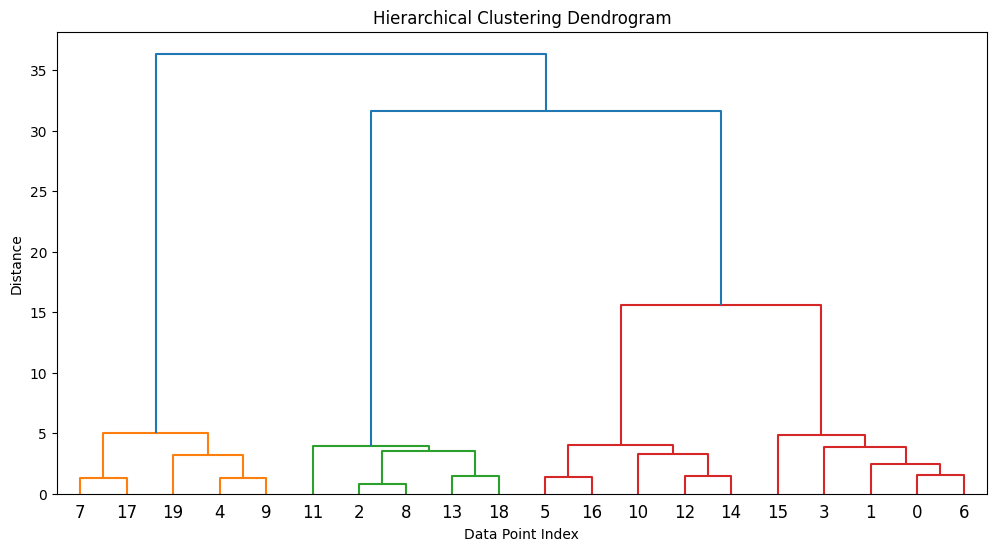

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import make_blobs

# Generate synthetic data
X, _ = make_blobs(n_samples=20, centers=4, cluster_std=1.5, random_state=42)

# Perform hierarchical clustering
linkage_matrix = linkage(X, method='ward')  # Using Ward's method for linkage

# Plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Point Index')
plt.ylabel('Distance')
plt.show()

In the previous graph, the dendrogram visualization of hierarchical clustering illustrates how clusters are merged step-by-step, starting from individual data points and gradually forming larger clusters. The height of each merge in the dendrogram represents the distance or dissimilarity between the clusters being merged. By inspecting the dendrogram, you can identify clusters at different levels of granularity and determine an appropriate number of clusters based on the desired level of clustering.

Comparison in terms of interpretability and use cases.

K-means clustering is straightforward and interpretable, suitable for datasets with a known number of clusters. Mean Shift clustering is adaptive and effective for datasets with varying densities, while hierarchical clustering provides a hierarchical decomposition of the data, allowing users to explore clusters at different levels of detail. The choice between these clustering algorithms depends on the characteristics of the dataset, the desired level of interpretability, and the specific goals of the analysis.

**Submission Guidelines (1 mark)**

Jupyter Notebook Submission (1 mark):

* Organize the tasks into a Jupyter Notebook with appropriate headings, code cells, and markdown explanations.
* Include comments in the code cells for clarity.
